<p style="font-family:Times New Roman; font-size:120%">
    -Aleksander Nistad Sekkelsten
</p>
<h1 style="font-family:Times New Roman; font-size: 300%"><center> Machine Learning For Physics; Project 1 </center></h1>



---
<h2 style="font-family:Times New Roman; font-size:200%">Part I | Initializing Notebook |</h2>

In [1]:
import Pkg; Pkg.activate(".julia/environments/v1.10/Project.toml")
Pkg.add(["SCS", "Convex","PlotThemes","Images"])
using Flux, Plots, Random, NBInclude, LinearAlgebra, Statistics, Distributions, Convex, SCS, Images
using Plots.PlotMeasures
using StatsBase: sample
theme(:dao)

  Activating project at `~/.julia/environments/v1.10`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [37]:
@nbinclude("/Users/aleksandersekkelsten/Downloads/Project 1 function.ipynb")

CrossValidation

In [38]:
?CrossValidation

search: CrossValidation



```
CrossValidation(X, Y, Z, k_folds::Int64, degrees::Int64, Method; lambda=0)
```

Performs k-fold cross-validation to evaluate a regression model on the provided dataset. The function splits the data into `k_folds`, fits a model on the training data, and evaluates it on the test data for each fold, returning the mean error across all folds.

# Arguments

  * `X::Array{Float64}`: The x-coordinates of the input data (for grid).
  * `Y::Array{Float64}`: The y-coordinates of the input data (for grid).
  * `Z::Array{Float64}`: The z-values (target) of the dataset.
  * `k_folds::Int64`: The number of folds to use in cross-validation. The data is split into `k_folds` parts, where each part is used once as the test set.
  * `degrees::Int64`: The degree of the polynomial used to construct the design matrix.
  * `Method::Symbol`: The regression method to use. Can be:

      * `:OLS` for Ordinary Least Squares.
      * `:Ridge` for Ridge regression.
      * `:Lasso` for Lasso regression.
  * `lambda::Float64` (optional): The regularization parameter for Ridge or Lasso regression. Default is `0` (no regularization).

# Returns

  * `mean_error::Float64`: The mean error (MSE) across all the k-folds of cross-validation.

# Details

1. **Data Processing**: The input data `X`, `Y`, and `Z` are flattened and reshaped to prepare for the regression model. A design matrix is constructed using the `DataProjector` function, mapping the inputs into a higher-dimensional polynomial space defined by `degrees`.
2. **Shuffling and Splitting**: The data is shuffled randomly to remove any bias from its original ordering. The shuffled data is split into `k_folds` parts for cross-validation.
3. **Cross-Validation Loop**: For each fold:

      * The training set consists of all data except the current fold, and the test set consists of the current fold.
      * A regression model is fitted on the training data.
      * The model is evaluated on the test data, and the error (MSE) is calculated.
4. **Error Calculation**: The mean squared error (MSE) is computed for each fold, and the average error across all folds is returned as the overall performance metric.

# Example

```julia X = rand(10) Y = rand(10) Z = rand(10, 10) k_folds = 5 degrees = 3 Method = :Ridge

meanerror = CrossValidation(X, Y, Z, k_folds, degrees, Method, lambda=0.1)


---
<h2 style="font-family:Times New Roman; font-size:200%">Part II | Preparing Franke Function |</h2>

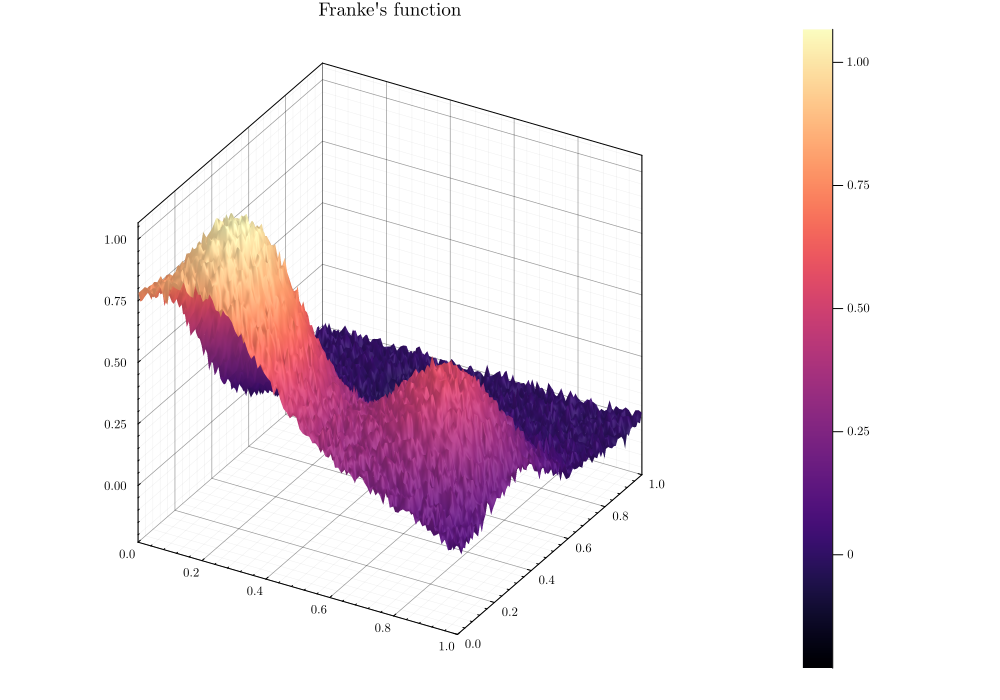

In [41]:
#X and Y range
X = range(0,1,100) |> collect 
Y = range(0,1,100) |> collect

Random.seed!(123)
ϵ=Normal(0, 0.02) # Noise
Z = Franke.(X',Y) .+ rand(ϵ,(100,100)) #Finding Z values

#Display Frankes funciton
surface(X,Y,Z, size=(1000,700),title="Franke's function")

---
<h2 style="font-family:Times New Roman; font-size:200%">Part III | Introducing OLS Regression |</h2>

In [ ]:

DM,Z_flat = DataProjector(X,Y, Z, 5,train=false)

xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.8)
D_M_train = DataProjector(xTrain, yTrain, zTrain, 5)
D_M_test = DataProjector(xTest, yTest, zTest, 5)

betaVals = Regression(D_M_train,zTrain,"OLS")
est = DM*betaVals

r2 = round(R2(D_M_test, zTest,betaVals),digits=4)
mse = round(MSE(D_M_test,zTest,betaVals),digits=4)

surface(X,Y,Z, layout=(1,2), cbar=false, c=:grays,size=(900,400),title="Ground Truth")
surface!(subplot=2,X,Y,reshape(est, (100,100)), cbar=false, title="Regression, MSE: $(mse) R2 = $(r2)")

In [6]:
DM,Z_flat = DataProjector(X,Y, Z, 5,train=false,normalize=false)

([1.0 0.0 … 0.0 0.0; 1.0 0.010101010101010102 … 0.0 0.0; … ; 1.0 0.98989898989899 … 0.98989898989899 1.0; 1.0 1.0 … 1.0 1.0], [0.7825863498542225, 0.7408899906204466, 0.7377043500767736, 0.7474868504560255, 0.7571751612607839, 0.7511803004298346, 0.732863392429973, 0.7084405670141984, 0.730712831513705, 0.7202400702570643  …  -0.06604138053076845, -0.012511207278854264, -0.02760643785794465, -0.0058408863780550465, -0.0029773028561855567, -0.012356191438078104, -0.016299631557830572, 0.0025389500852499142, -0.01584425417806084, 0.02121899090848535])

---
<h2 style="font-family:Times New Roman; font-size:200%">Part IV | Introducing Ridge and Lasso Regression |</h2>

In [7]:
lambdaVals = [1e-4,1e-1,1]

#Solve β for OLS and find estimate
betaValsOLS = Regression(D_M_train,zTrain,"OLS")
estOLS = DM*betaValsOLS

#R2 and MSE value for OLS
r2OLS = round(R2(D_M_test, zTest,betaValsOLS),digits=4)
mseOLS = round(MSE(D_M_test,zTest,betaValsOLS),digits=4)

println("OLS   |  MSE  = ",  mseOLS, "  R2 value = ", r2OLS, "\n")

surf = surface(X,Y,Z, layout=(4,2), cbar=false, c=:grays,size=(500,1000),title="Ground Truth")
surface!(surf,subplot=2,X,Y,reshape(estOLS, (100,100)), cbar=false, title="OLS Regression ")

for (i,lambda) in enumerate(lambdaVals) #Looping over various λ values: lambdaVals = [1e-4,1e-2,1e-1]
    #Solve β for Lasso and Ridge
    betaLasso = Regression(D_M_train, zTrain, "Lasso", λ=lambda)
    betaRidge = Regression(D_M_train, zTrain, "Ridge", λ=lambda)
    
    #Calculate MSE
    MSELasso = round(MSE(D_M_test, zTest, betaLasso, λ=0, γ=lambda),digits=4)
    MSERidge = round(MSE(D_M_test, zTest, betaRidge, λ=lambda, γ=0),digits=4)
    
    #Calculate R2 value
    r2Lasso = round(R2(D_M_test, zTest, betaLasso),digits=4)
    r2Ridge = round(R2(D_M_test, zTest, betaRidge),digits=4)
    
    println("Lasso |  λ = ", lambda,"  MSE:  ", MSELasso, "  R2 value = ", r2Lasso)
    println("Ridge |  λ = ", lambda,"  MSE:  ", MSERidge, "  R2 value = ", r2Ridge, "\n")
    
    #Find estimated answer
    estLasso = DM*betaLasso
    estRidge = DM*betaRidge
    
    #Display result
    surface!(surf,subplot=2*(i+1),X,Y,reshape(estLasso, (100,100)), cbar=false, title="Lasso Regression | λ= $(lambda)")
    surface!(surf,subplot=(2*(i+1)-1),X,Y,reshape(estRidge, (100,100)), cbar=false, title="Ridge Regression | λ= $(lambda)")
end

OLS   |  MSE  = 0.0025  R2 value = 0.9704

Lasso |  λ = 0.0001  MSE:  0.0414  R2 value = 0.9704
Ridge |  λ = 0.0001  MSE:  1.0328  R2 value = 0.9704

Lasso |  λ = 0.1  MSE:  10.7632  R2 value = 0.9559
Ridge |  λ = 0.1  MSE:  11.133  R2 value = 0.9291

Lasso |  λ = 1.0  MSE:  22.8137  R2 value = 0.9122
Ridge |  λ = 1.0  MSE:  12.4153  R2 value = 0.8902



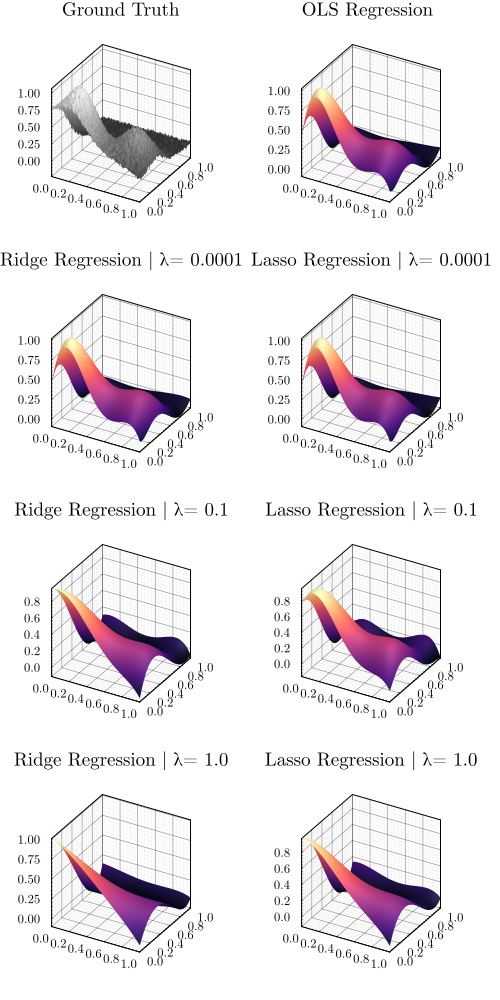

In [43]:
display(surf)

---
<h2 style="font-family:Times New Roman; font-size:200%">Part V | Performance Comparison |</h2>
<p style="font-family:Times New Roman; font-size:120%">
    This section is rather large, we first compare Test/Train Errors, then introduce Bootstrap resampling and analyze Error, Bias and Variance. Then we look at Cross-Validation. (Task e-f)
</p>

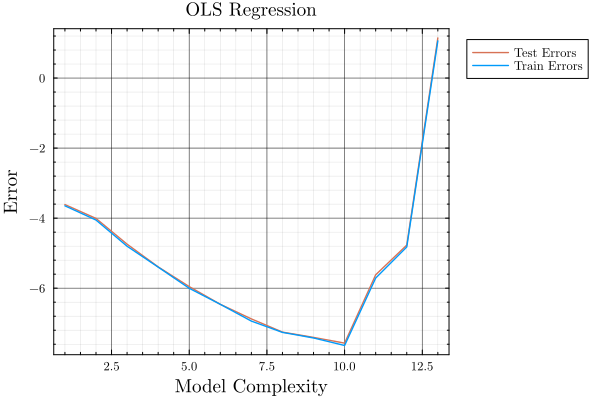

In [9]:
degrees = range(1,13) |> collect #Range of polynomial degrees

Test_Errors = zeros(length(degrees))
Train_Errors = zeros(length(degrees))
        
for (i,degree) in enumerate(degrees)
    #  ----  Initializing Data  ----
    xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.7)

    D_M_train = DataProjector(xTrain, yTrain, zTrain, degree)
    D_M_test = DataProjector(xTest, yTest, zTest, degree)

    #  ----  Solving OLS  ----
    betaValsOLS = Regression(D_M_train,zTrain,"OLS")
    
    #  ---- Updating Errors  ----
    Test_Errors[i] = MSE(D_M_test,zTest,betaValsOLS)
    Train_Errors[i] = MSE(D_M_train,zTrain,betaValsOLS)
end

plot(degrees, log.(Test_Errors), label="Test Errors", xlabel="Model Complexity", ylabel="Error", title = "OLS Regression")
plot!(degrees, log.(Train_Errors), label="Train Errors")

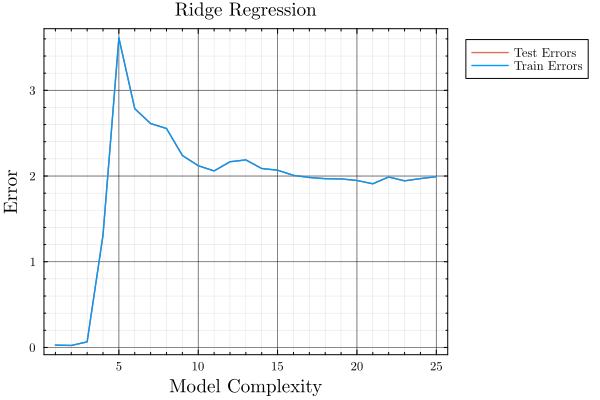

In [11]:
lambda = 1e-3 #λ for Ridge Regression
degrees = range(1,25) |> collect #Range of polynomial degrees

Test_Errors = zeros(length(degrees))
Train_Errors = zeros(length(degrees))
Bias = zeros(length(degrees))
Variance = zeros(length(degrees))
                
for (i,degree) in enumerate(degrees)
    
    #  ----  Initializing Data  ----
    xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.7)
    
    D_M_train = DataProjector(xTrain, yTrain, zTrain, degree)
    D_M_test = DataProjector(xTest, yTest, zTest, degree)

    #  ----  Solving Ridge  ----
    betaVals = Regression(D_M_train,zTrain,"Ridge", λ=lambda)
    
    #  ---- Updating Errors  ----
    Test_Errors[i] = MSE(D_M_test,zTest,betaVals, λ = lambda,γ=0)
    Train_Errors[i] = MSE(D_M_train,zTrain,betaVals, λ = lambda, γ=0)
end

plot(degrees, Test_Errors, label="Test Errors", xlabel="Model Complexity", ylabel="Error", title="Ridge Regression")
plot!(degrees, Train_Errors, label="Train Errors")

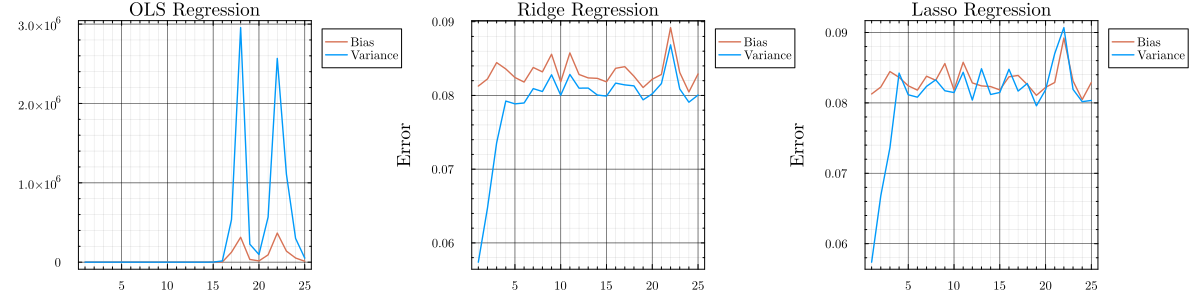

In [12]:
lambda = 1e-3 #λ for Ridge Regression
degreeList = range(1,25) |> collect #Range of polynomial degrees

BiasOLS = zeros(length(degrees))
VarianceOLS = zeros(length(degrees))
BiasRidge = zeros(length(degrees))
VarianceRidge = zeros(length(degrees))
BiasLasso = zeros(length(degrees))
VarianceLasso = zeros(length(degrees))

for (i, degree) in enumerate(degreeList)
    #  ----  Initializing Data  ----
    xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.7)
    
    D_M_train = DataProjector(xTrain, yTrain, zTrain, degree)
    D_M_test = DataProjector(xTest, yTest, zTest, degree)
    #  ----  Solving OLS, Ridge, Lasso  ----
    betaValsOLS = Regression(D_M_train,zTrain,"OLS")
    betaValsRidge = Regression(D_M_train,zTrain,"Ridge", λ=lambda)
    betaValsLasso = Regression(D_M_train,zTrain,"Lasso", λ=1e-2)
    if length(betaValsLasso)==1
        betaValsLasso = Regression(D_M_train,zTrain,"Lasso", λ=1e-3)
    end
    
    #  ----  Calculating Bias & Variance  ----
    BiasOLS[i] = mean((mean(D_M_test*betaValsOLS) .-zTest).^2)
    VarianceOLS[i] = var(D_M_test*betaValsOLS)

    BiasRidge[i] = mean((mean(D_M_test*betaValsRidge) .-zTest).^2)
    VarianceRidge[i] = var(D_M_test*betaValsRidge)

    BiasLasso[i] = mean((mean(D_M_test*betaValsLasso) .-zTest).^2)
    VarianceLasso[i] = var(D_M_test*betaValsLasso)
end

plot(layout=(1,3), degrees, (BiasOLS), label="Bias", xlabel="Model Complexity", ylabel="Error", title = "OLS Regression",size=(1200,300))
plot!(degrees, (VarianceOLS), label="Variance")

plot!(subplot=2, degrees, (BiasRidge), label="Bias", xlabel="Model Complexity", ylabel="Error", title = "Ridge Regression")
plot!(subplot=2, degrees, (VarianceRidge), label="Variance")

plot!(subplot=3, degrees, (BiasLasso), label="Bias", xlabel="Model Complexity", ylabel="Error", title = "Lasso Regression")
plot!(subplot=3,degrees, (VarianceLasso), label="Variance")

<h2 style="font-family:Times New Roman; font-size:200%">Bootstrap Resampling</h2>

In [14]:
degs = range(1,12) |> collect
numBootstraps=1000
errors = zeros(length(degs))
biases = zeros(length(degs))
variances = zeros(length(degs))
            
for (i,deg) in enumerate(degs)
    
    #  ----  Initializing Data  ----
    D_M_train = DataProjector(xTrain, yTrain, zTrain, deg)
    D_M_test = DataProjector(xTest, yTest, zTest, deg)
    
    #  ----  Apply Bootstrap  ----
    bootstrapBetas = Bootstrap(xTrain, yTrain, zTrain, deg, numBootstraps,"OLS")

    #  ----  Analyzing Results  ----
    est_test = zeros(length(zTest),numBootstraps)
    for i in 1:numBootstraps
        est_test[:,i] = D_M_test*bootstrapBetas[:,i]
    end
    
    #  ----  Update: Error, Bias and Variance  ----
    errors[i] = mean( mean((zTest .- est_test).^2, dims=1) )
    biases[i] = mean( (zTest .- mean(est_test, dims=1)).^2 )
    variances[i] = mean( var(est_test, dims=1) )
end

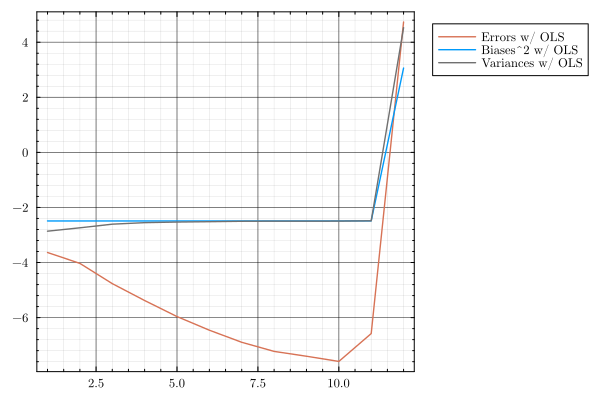

In [15]:
degs = range(1,12) |> collect
plot(degs, log.(errors), label="Errors w/ OLS")
plot!(degs, log.(biases), label="Biases^2 w/ OLS")
plot!(degs, log.(variances), label="Variances w/ OLS")

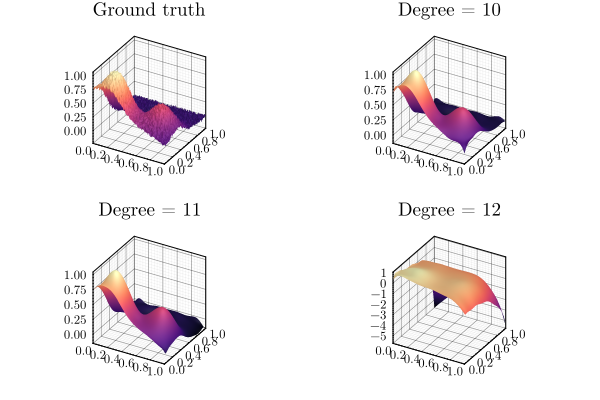

In [44]:
p = surface(X,Y,Z, layout=(2,2),title="Ground truth",cbar=false)

for i in 10:12 #Degrees 10,11 and 12
    #  ----  Initializing Data  ----
    DM,Z_flat = DataProjector(X,Y, Z, i,train=false)

    xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.7)
    D_M_train = DataProjector(xTrain, yTrain, zTrain, i)
    D_M_test = DataProjector(xTest, yTest, zTest, i)

    #  ---- Solve for OLS  ----
    betaVals = Regression(D_M_train,zTrain,"OLS")
    estim = DM*betaVals
    
    #  ----  Display  ----
    surface!(p,subplot=(i-8),X,Y,reshape(estim, (100,100)),title="Degree = $(i)",cbar=false)
end
display(p)

In [17]:
degs = range(1,15) |> collect

Ridge_errors = zeros(length(degs))
Ridge_biases = zeros(length(degs))
Ridge_variances = zeros(length(degs))
            
for (i,deg) in enumerate(degs)
    
    #  ----  Initializing Data  ----
    D_M_train = DataProjector(xTrain, yTrain, zTrain, deg)
    D_M_test = DataProjector(xTest, yTest, zTest, deg)
    
    #  ----  Apply Bootstrap  ----
    bootstrapBetas = Bootstrap(xTrain, yTrain, zTrain, deg, numBootstraps,"Ridge", λ=1e-3)

    #  ----  Analyzing Results  ----
    est_test = zeros(length(zTest),numBootstraps)
    for i in 1:numBootstraps
        est_test[:,i] = D_M_test*bootstrapBetas[:,i]
    end
    
    #  ----  Update: Error, Bias and Variance  ----
    Ridge_errors[i] = mean( mean((zTest .- est_test).^2, dims=1) )
    Ridge_biases[i] = mean( (zTest .- mean(est_test, dims=1)).^2 )
    Ridge_variances[i] = mean( var(est_test, dims=1) )
end


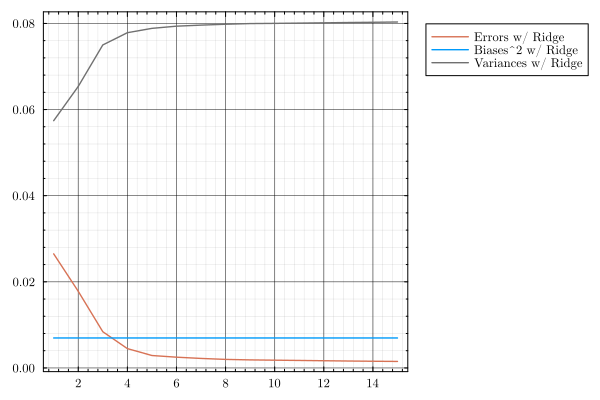

In [18]:
Ridge = plot(degs, (Ridge_errors), label="Errors w/ Ridge")
plot!(Ridge,degs, (Ridge_biases.^2), label="Biases^2 w/ Ridge")
plot!(Ridge, degs, (Ridge_variances), label="Variances w/ Ridge")

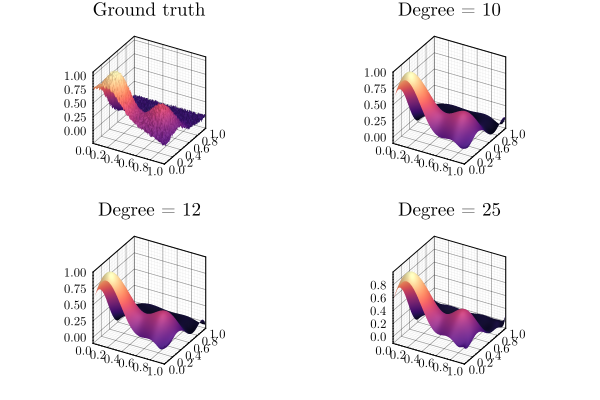

In [45]:
degrees = [10, 12, 25]
p = surface(X,Y,Z, layout=(2,2),title="Ground truth",cbar=false)

for (i,degree) in enumerate(degrees) #Degrees 10,11 and 12
    #  ----  Initializing Data  ----
    DM,Z_flat = DataProjector(X,Y, Z, degree,train=false)

    xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.7)
    D_M_train = DataProjector(xTrain, yTrain, zTrain, degree)
    D_M_test = DataProjector(xTest, yTest, zTest, degree)

    #  ---- Solve for Ridge  ----
    betaVals = Regression(D_M_train,zTrain,"Ridge", λ=1e-3)
    estim = DM*betaVals
    
    #  ----  Display  ----
    surface!(p,subplot=(i+1),X,Y,reshape(estim, (100,100)),title="Degree = $(degree)",cbar=false)
end
display(p)

<h2 style="font-family:Times New Roman; font-size:200%">k-fold Cross-Validation</h2>

In [28]:
degree=12
CVOLS = CrossValidation(X, Y, Z, 10, degree,"OLS")

xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.7)
D_M_train = DataProjector(xTrain, yTrain, zTrain, degree)
D_M_test = DataProjector(xTest, yTest, zTest, degree)

bootstrapBetas = Bootstrap(xTrain, yTrain, zTrain, degree, 1000,"OLS")
BOLS = MSE(D_M_test,zTest,vec(mean(bootstrapBetas,dims=2)), λ=0, γ=0)
CVRidge = CrossValidation(X, Y, Z, 10, degree, "Ridge", lambda=1e-4)
CVLasso = CrossValidation(X, Y, Z, 10, degree, "Lasso", lambda=1e-4)


println(" -----  CrossValidation Scores  ----- ", "\n")
println(" OLS   :  ", CVOLS, " B-Strap :  ", BOLS)
println(" Ridge :  ", round(CVRidge,digits=4))
println(" Lasso :  ", round(CVLasso,digits=4))

 -----  CrossValidation Scores  ----- 

 OLS   :  1.607353698836731 B-Strap :  0.09148002642683092
 Ridge :  1.6612
 Lasso :  0.1854


In [22]:
CVOLS = CrossValidation(X, Y, Z, 10, 5,"OLS")

xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(X,Y,Z,0.7)
D_M_train = DataProjector(xTrain, yTrain, zTrain, 5)
D_M_test = DataProjector(xTest, yTest, zTest, 5)
bootstrapBetas = Bootstrap(xTrain, yTrain, zTrain, 5, 1000,"OLS")
BOLS = MSE(D_M_test,zTest,vec(mean(bootstrapBetas,dims=2)), λ=0, γ=0)
CVRidge = CrossValidation(X, Y, Z, 10, 5, "Ridge", lambda=1e-4)
CVLasso = CrossValidation(X, Y, Z, 10, 5, "Lasso", lambda=1e-4)


println(" -----  CrossValidation Scores  ----- ", "\n")
println(" OLS   :  ", CVOLS, " B-Strap :  ", BOLS)
println(" Ridge :  ", round(CVRidge,digits=4))
println(" Lasso :  ", round(CVLasso,digits=4))

 -----  CrossValidation Scores  ----- 

 OLS   :  0.00251552069966107 B-Strap :  0.0024708075394363318
 Ridge :  1.0342
 Lasso :  0.0413


---
<h2 style="font-family:Times New Roman; font-size:200%">Part VI | Real Image Data |</h2>

In [23]:
#  ----  Load Image  ----
img = load("/Users/aleksandersekkelsten/Downloads/SRTM_data_Norway_2.tif")
img_array = convert(Array{Float64}, img) #3601 x 1801

#  ----  Defining X and Y range  ----
y_img = range(1,3601) |> collect 
x_img = range(1,1801) |> collect

1801-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 1790
 1791
 1792
 1793
 1794
 1795
 1796
 1797
 1798
 1799
 1800
 1801

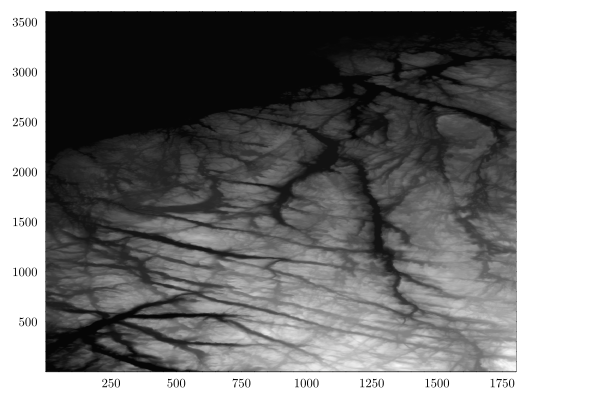

In [24]:
heat = heatmap(img_array, color = :greys, cbar=false)

In [ ]:
#  ----  Selecting an area of the Image  ----
(xmin,xmax) = (1250,1350)
(ymin,ymax) = (2350,2450)
img=img_array[ymin:ymax,xmin:xmax]
y_img = range(ymin,ymax) |> collect
x_img = range(xmin,xmax) |> collect

#  ----  Displaying The Selected Area  ----
heat = heatmap(layout = (1,2), img_array[1:end,1:end], color = :greys, cbar=false,size=(1000,400))
plot!(subplot=1,heat,[xmin,xmax], [ymin,ymin], ls=:dot,c=:red,alpha=0.8,label=false)
plot!(subplot=1,heat,[xmin,xmax], [ymax,ymax], ls=:dot,c=:red,alpha=0.8,label=false)
plot!(subplot=1,heat,[xmin,xmin], [ymin,ymax], ls=:dot,c=:red,alpha=0.8,label=false)
plot!(subplot=1,heat,[xmax,xmax], [ymin,ymax], ls=:dot,c=:red,alpha=0.8,label=false)
heatmap!(subplot=2,img_array[ymin:ymax,xmin:xmax], color = :greys, cbar=false)
display(heat)

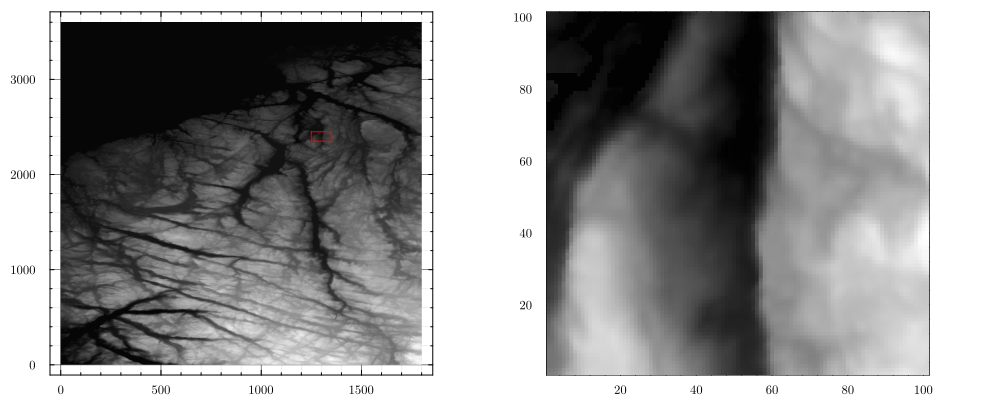

In [30]:
display(heat)

In [26]:
# ----  Initializing Data  ----
deg=110
DM_img,img_flat = DataProjector(x_img,y_img, img, deg,train=false,normalize=true)
xTrain, yTrain, zTrain, xTest, yTest, zTest = SplitData2D(x_img,y_img, img,0.8)
D_M_train, Train_stds, Train_mus = DataProjector(xTrain, yTrain, zTrain, deg,normalize=true)
D_M_test, Test_stds, Test_mus = DataProjector(xTest, yTest, zTest, deg,normalize=true)

#  ----  Solving β for OLS, Ridge and Lasso  ----
betasRidge = Regression(D_M_train,zTrain,"Ridge", λ=1e-2)
estRidge = DM_img*(betasRidge)

betasOLS = Regression(D_M_train,zTrain,"OLS")
estOLS = DM_img*(betasOLS)

betasLasso = Regression(D_M_train,zTrain,"Lasso", λ=1e-2)
estLasso = DM_img*(betasLasso)

10201-element Vector{Float64}:
 0.006796960225891766
 0.006363264221755655
 0.006353511371169007
 0.005808360733627452
 0.006643020964298147
 0.0069090654630146395
 0.0068182488245664705
 0.006132252228227034
 0.005216454767041299
 0.006039055328625918
 0.006068875902987353
 0.005673000443596979
 0.005503106081437785
 ⋮
 0.008311505886501378
 0.009432032909462264
 0.008819216331134548
 0.00910466090439456
 0.008819224240008952
 0.009481123682981011
 0.009481199318270335
 0.00910733765578676
 0.009045331892089612
 0.00953627399808817
 0.008829880293557683
 0.00914050394036022

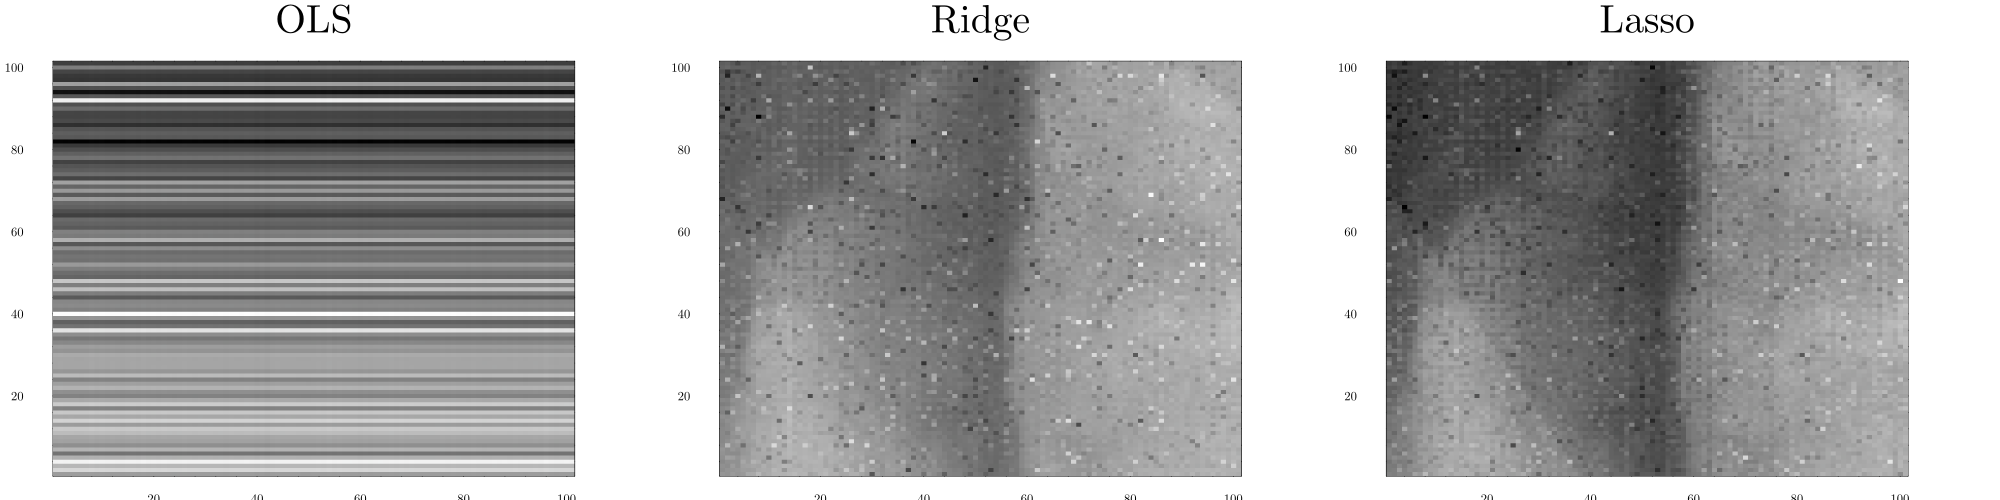

In [27]:
heatmap(layout=(1,3),reshape(estOLS, (ymax-ymin+1,xmax-xmin+1)), color = :greys,size=(2000,500),cbar=false,title="OLS",titlefontsize=25, top_margin=10mm)
heatmap!(subplot=2,reshape(estRidge, (ymax-ymin+1,xmax-xmin+1)), color = :greys,cbar=false,title="Ridge",titlefontsize=25, top_margin=10mm)
heatmap!(subplot=3,reshape(estLasso, (ymax-ymin+1,xmax-xmin+1)), color = :greys,cbar=false,title="Lasso",titlefontsize=25, top_margin=10mm)